In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")


In [24]:
df = pd.read_csv("mustang_data.csv")
df.head()

,wait_time,run_time,node_count
0,20.000000,7.000000,1
1,18.000000,5.000000,1
2,7.000000,38.000000,1
3,10.000000,42.000000,800
4,2.000000,8.000000,1


In [25]:
pd.set_option('display.float_format', '{:.6f}'.format)
df["node_count"].describe()

count   1946208.000000
mean          9.649025
std          39.611788
min           1.000000
25%           1.000000
50%           1.000000
75%           9.000000
max        1600.000000
Name: node_count, dtype: float64

In [26]:
bins = [0, 1, 4, 8, 16, np.inf]
labels = ['1', '4', '8', '16', '>16']

df['cpus'] = pd.cut(df['node_count'], bins, labels=labels)
df_count = df['cpus'].value_counts(normalize=True).reindex(labels)

df.head()

,wait_time,run_time,node_count,cpus
0,20.000000,7.000000,1,1
1,18.000000,5.000000,1,1
2,7.000000,38.000000,1,1
3,10.000000,42.000000,800,>16
4,2.000000,8.000000,1,1


In [27]:
df_filter = df[(df["run_time"] > 600) & (df["wait_time"] < 21600)].copy()
df_filter['ratio'] = df_filter['wait_time'] / df_filter['run_time']
mean_values = df_filter.groupby('node_count', observed=True)['ratio'].mean()[:17]
df_filter.head()

,wait_time,run_time,node_count,cpus,ratio
11,15.000000,880.000000,1,1,0.017045
15,12.000000,2816.000000,2,4,0.004261
20,9.000000,4495.000000,1,1,0.002002
21,9.000000,4526.000000,1,1,0.001989
49,2.000000,2314.000000,64,>16,0.000864


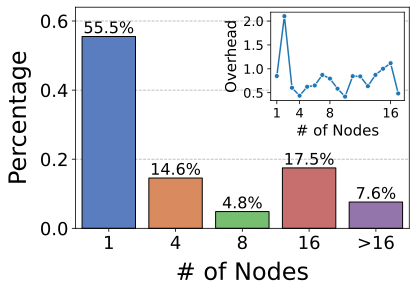

In [28]:
colors = sns.color_palette("muted", 5)
palette = [sns.desaturate(color, 1) for color in colors]
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=df_count.index, y=df_count.values, palette=palette, ax=ax, zorder=2, edgecolor='black')

for patch in ax.patches:
    value = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2.,
            value,
            f'{value*100:.1f}%',
            ha='center',
            va='bottom',
            fontsize=16)

locs, labels = plt.yticks()
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(False)
ax.set_ylim(0, 0.64)
ax.tick_params(axis='both', labelsize=18)
ax.xaxis.labelpad = 9
ax.yaxis.labelpad = 9
plt.xlabel('# of Nodes', fontsize=24)
plt.ylabel('Percentage', fontsize=24)

ax_inset = inset_axes(ax, width="40%", height="40%", loc='upper right')

sns.lineplot(x=mean_values.index, y=mean_values.values, ax=ax_inset, marker='o', markersize = 5)

ax_inset.set_xlabel('# of Nodes', fontsize=15)
ax_inset.set_ylabel('Overhead', fontsize=15)
ax_inset.tick_params(axis='both', labelsize=13)
plt.xticks([1, 4, 8, 16])
plt.yticks([0.5, 1, 1.5, 2])

plt.savefig("overhead_node.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [29]:
mean_values.mean()

0.8078669795606835